# Projeto A3 Inteligência Artificial

## Identificação da Equipe


*   **ALDAIR LIMA PEREIRA**.

*   **AMANDA NASCIMENTO CAMPOS**.

*   **BRENO BARRETO CAMPOS**.

*   **GABRIEL FAGUNDES DE ALMEIDA**.

## Etapa 1: Análise do Problema

### Entendimento do Problema

O conjunto de dados coletado apresenta informações referentes à **amostras de leite**, cada uma delas contendo **8** atributos:

**pH**: indica o potencial hidrogeniônico da amostra.

**Temperatura (Temperature)**: indica o quanto de calor uma amostra possui em Celsius.

**Gosto (Taste)**: atributo binário que indica se uma amostra possui gosto bom ou ruim (0 = ruim, 1 = bom).

**Odor**: outro atributo binário que indica se uma amostra possui cheiro bom ou ruim (0 = ruim, 1 = bom).

**Gordura (Fat)**: mais um atributo binário que indica se uma amostra possui muita gordura ou não (0 = pouca, 1 = muita).

**Turbidez (Turbidity)**: o último atributo binário que indica se uma amostra aprensenta elevado grau de turbidez ou não (0 = baixo, 1 = elevado).

**Cor (Colour)**: indica a cor da amostra de leite em tons de branco (quanto mais próximo de 255,  mais branca a amostra é).

**Nota (Grade)**: indica a qualidade do leite, podendo ser baixa, média ou alta.

Os detalhes especificados acima estavam disponíveis na página fonte do conjunto de dados (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality).

Nosso **objetivo** é construir um modelo de aprendizado de máquina capaz de conseguir classificar se uma amostra de leite é de **alta**, **média** ou **baixa** qualidade, levando em consideração suas características. Com isso em mente, nosso atributo alvo é a coluna **Grade**.

Para alcançá-lo, nós iremos:

**Analisar** os dados para identificar como os valores estão distribuídos.

**Modificar** os dados para adicionar uma camada extra de desafio.

**Limpar** os dados para eliminar valores problemáticos.

**Preparar** os dados a fim de deixá-los adequados para o modelo de aprendizado de máquina.

Utilizaremos **pipelines** para automatizar alguns desses processos.

### Enquadramento do problema

**Quanto à Supervisão**: Supervisionado, pois estamos lidando com dados rotulados.

**Quanto à Tarefa**: Classificação multiclasse, pois desejamos categorizar uma nova amostra entre mais de duas classes possíveis.

**Quanto ao Modo**: Em lote, pois desejamos treinar o modelo e, posteriormente, colocá-lo em execução.

Considerando que nossa tarefa é de **classificação**, nossas medidas de desempenho serão **precisão**, **revocação** e **curva ROC**.

## Etapa 2: Análise dos dados

### Imports

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Alteração dos dados conforme a instrução 2.1.5 do documento de requisitos do projeto

**Modificaremos** o conjunto de dados que iremos utilizar no projeto para, de **10%** das colunas presentes, **removermos** **3%** dos dados e alterarmos outros **3%** para valores **aleatórios**.

O primeiro passo é carregar o conjunto e atribuí-lo à variável "dados", criada abaixo.

In [ ]:
dados = pd.read_csv("milknew.csv")

Antes de realizarmos a alteração em si, criaremos uma cópia do conjunto de origem para preservar os dados originais.

O nome da cópia será "dados_alterados".

In [ ]:
dados_alterados = dados.copy()

Além disso, para facilitar a leitura, criaremos uma variável auxiliar para guardar o valor correspondente a 3% das linhas da tabela, assim como outra para guardar o índice da última linha.

In [ ]:
tres_por_cento_das_linhas = math.ceil(len(dados) * 0.03)

In [ ]:
tres_por_cento_das_linhas

32

In [ ]:
indice_da_ultima_linha = len(dados) - 1

In [ ]:
indice_da_ultima_linha

1058

Agora, utilizaremos a função "randint" da biblioteca "random" para gerar um valor aleatório de 0 a 7.

O valor aleatoriamente selecionado será o índice da coluna que alteraremos.

In [ ]:
coluna_aleatoriamente_selecionada = random.randint(0,7)

In [ ]:
coluna_aleatoriamente_selecionada

3

 A coluna selecionada para ser modificada foi a "Odor" (coluna com índice 3).

Continuando, criaremos uma função para selecionar aleatoriamente uma linha.

In [ ]:
def selecionar_linha_aleatoria():
  linha_selecionada = random.randint(0, indice_da_ultima_linha)
  return linha_selecionada

Criaremos mais uma função para selecionar aleatoriamente 3% das linhas da coluna "Odor" e trocar por valores nulos.

In [ ]:
def trocar_valores_por_nulo():
  for i in range(0, tres_por_cento_das_linhas):
    linha_aleatoria = selecionar_linha_aleatoria()
    dados_alterados.iloc[linha_aleatoria, coluna_aleatoriamente_selecionada] = np.nan

Criaremos a última função para selecionar aleatoriamente 3% das linhas da coluna "Odor" e trocar por valores aleatórios.

Os valores aleatórios poderão variar de **0 até 1_000_000**.

In [ ]:
def trocar_valores_por_valores_aleatorios():
  for i in range(0, tres_por_cento_das_linhas):
    linha_aleatoria = selecionar_linha_aleatoria()
    dados_alterados.iloc[linha_aleatoria, coluna_aleatoriamente_selecionada] = random.randint(0, 1_000_000)

Antes de executar as funções, vamos checar quantos dados nulos a coluna "Odor" possui.

In [ ]:
dados_alterados.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

É visível que **não existem** valores nulos nela.

Além disso, checaremos as estatísticas descritivas da coluna "Odor".

In [ ]:
dados_alterados.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


É visível que os dados se comportam de forma **binária** nela.

Agora, aplicaremos abaixo as funções para eliminar aleatoriamente 3% dos valores dessa coluna, assim como transformar, também aleatoriamente, outros 3% dos valores dessa mesma coluna em números aleatórios.

In [ ]:
trocar_valores_por_valores_aleatorios()

In [ ]:
trocar_valores_por_nulo()

Verificando se 3% dos valores foram realmente removidos:

In [ ]:
dados_alterados.isnull().sum()

pH             0
Temprature     0
Taste          0
Odor          32
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

Podemos ver acima que 32 valores da coluna "Odor" se tornaram nulos.

32 é 3% de 1059.

Verificando se os valores foram realmente alterados:

In [ ]:
dados_alterados.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1027.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,15869.506329,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,102747.368935,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,949650.000000,1.000000,1.000000,255.000000


Podemos ver que a coluna "Odor", apresentada pelo método "describe" acima, a qual era anteriormente um atributo binário, agora contém números totalmente aleatórios como mostrado nas linhas de "max", "desvio padrão" e "média".

Por fim, transformaremos o conjunto de dados que alteramos em ".csv"

In [ ]:
dados_alterados.to_csv("milknew_alterado.csv")

### Obtenção e Visualização de dados básica

Este conjunto de dados foi retirado de "Kaggle Datasets".

Você pode acessá-lo pelo link: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

Iniciando a análise, iremos **carregar** os dados do arquivo "milknew_alterado.csv", o qual é o nosso conjunto de dados modificado pela etapa anterior, e o colocaremos na variável "dados_alterados", abaixo.

In [ ]:
dados_alterados = pd.read_csv("milknew_alterado.csv")

Antes de qualquer coisa, iremos **remover** a coluna "Unnamed: 0", que foi erroneamente gerada ao criarmos o arquivo "csv" na etapa de alteração de dados.

In [ ]:
dados_alterados = dados_alterados.drop('Unnamed: 0', axis=1)

Começando, para visualizar as **dez primeiras** instâncias do conjunto, onde cada instância (linha) representa uma amostra de leite, utilizaremos o método "head" com o argumento "10".

In [ ]:
dados_alterados.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0.0,1,0,254,high
1,6.6,36,0,1.0,0,1,253,high
2,8.5,70,1,1.0,1,1,246,low
3,9.5,34,1,1.0,0,1,255,low
4,6.6,37,0,396772.0,0,0,255,medium
5,6.6,37,1,1.0,1,1,255,high
6,5.5,45,1,331289.0,1,1,250,low
7,4.5,60,0,1.0,1,1,250,low
8,8.1,66,1,0.0,1,1,255,low
9,6.7,45,1,1.0,0,0,247,medium


Agora, utilizaremos o método "tail" com o argumento "10" para verificar as **dez últimas** instâncias.

In [ ]:
dados_alterados.tail(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1049,6.5,37,0,0.0,0,0,255,medium
1050,6.6,37,1,1.0,1,1,255,high
1051,5.5,45,1,0.0,1,1,250,low
1052,6.5,40,1,0.0,0,0,250,medium
1053,8.1,66,1,0.0,1,1,255,low
1054,6.7,45,1,1.0,0,0,247,medium
1055,6.7,38,1,0.0,1,0,255,high
1056,3.0,40,1,1.0,1,1,255,low
1057,6.8,43,1,0.0,1,0,250,high
1058,8.6,55,0,1.0,1,1,255,low


Após isso, o método "info" irá nos dar uma breve **resumida** em muitos aspectos importantes do nosso conjunto.

In [ ]:
dados_alterados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1027 non-null   float64
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 66.3+ KB


Seguindo, faremos uma rápida checada na **quantidade de cada valor** da coluna "Grade" com o método "value_counts".

In [ ]:
dados_alterados["Grade"].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

Para finalizar a visualização, iremos usar o método "describe", apresentando **estatísticas descritivas** importantes para nossa análise.

In [ ]:
dados_alterados.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1027.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,15118.186952,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,96069.267950,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,880387.000000,1.000000,1.000000,255.000000


### Observações da visualização de dados básica

**Observação 1:** A coluna do atributo alvo "Grade" apresenta apenas três tipos de valores: "low", "medium" e "high". Para evitar que nossos modelos tenham algum tipo de problema trabalhando com valores em texto, **iremos convertê-los para valores numéricos**.

**Observação 2:** Na coluna "Odor" existem **1027 dados não-nulos**, como mostrado pela saída do método "info". Isso significa que temos **32 valores nulos nesse atributo** que precisarão ser tratados.

**Observação 3:** Ainda na coluna "Odor", é visível a existência de **valores discrepantes**, como mostrado pela saída do método "describe". Estes valores também serão tratados.

### Visualização de dados em gráfico

#### Histogramas

Inicialmente, utilizaremos gráficos de **histograma** para ter uma **visualização geral** da distribuição dos dados no nosso conjunto.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb147c9d0>,
      dtype=object)

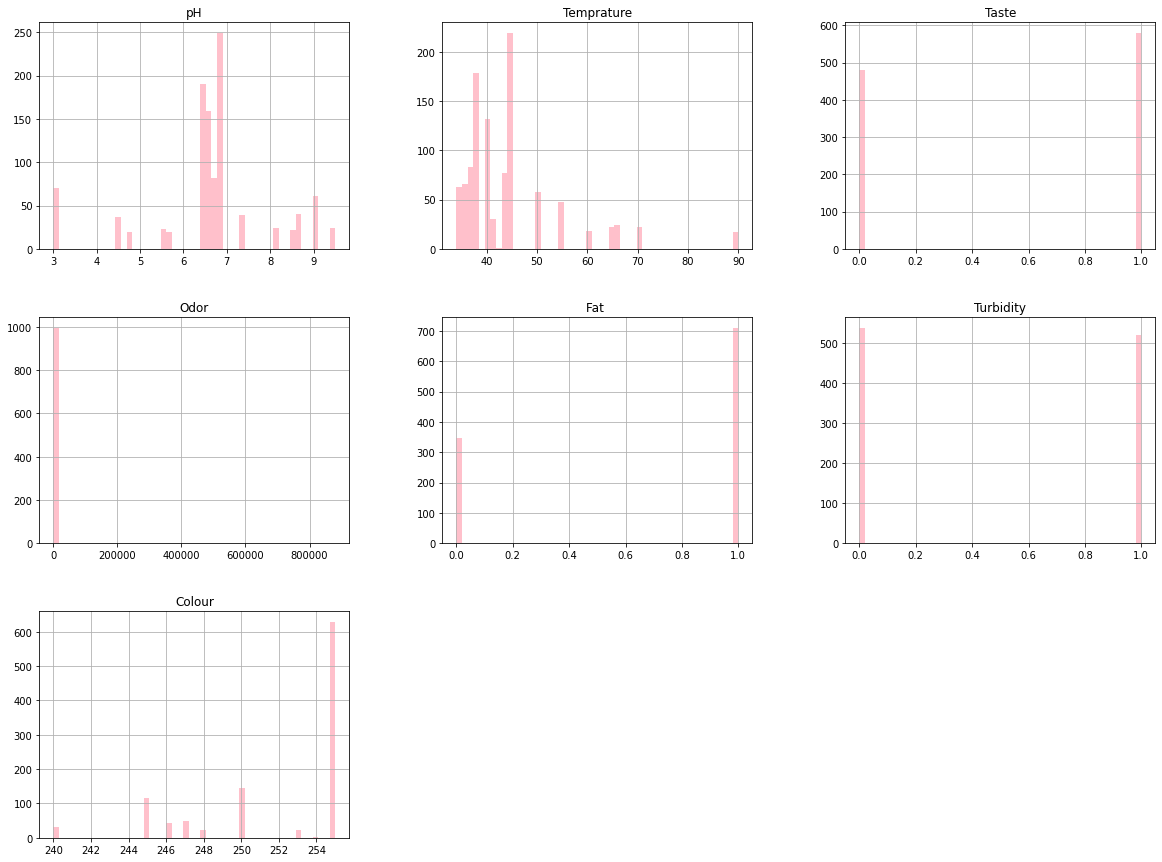

In [ ]:
dados_alterados.hist(bins=50, color="pink", figsize=(20,15))

#### Convertendo os valores da coluna alvo

Antes de prosseguir, iremos converter os valores do atributo alvo, os quais são texto, para valores numéricos.

Isso objetiva **evitar possíveis dificuldades** que nossos modelos poderão encontrar ao tentar processar dados em texto.

Além de que isso será útil na **matriz de correlação** que está por vir.

Faremos isso com a ajuda da função "map", a qual irá substituir os valores que fornecermos para ela por outros valores de nossa escolha.

In [ ]:
dados_alterados["Grade"] = dados_alterados["Grade"].map({"high":2, "medium":1 ,"low":0})

Como podemos ver abaixo, nosso atributo alvo, que antes se dividia em "low", "medium" e "high", agora se resume em "0", "1" e "2", respectivamente.

In [ ]:
dados_alterados["Grade"].value_counts()

0    429
1    374
2    256
Name: Grade, dtype: int64

#### Matriz de correlação

Em seguida, iremos verificar a **correlação** existente entre as colunas através da biblioteca "seaborn".

Para realizar esta tarefa, iremos utilizar um gráfico chamado "heatmap", o qual nos dirá o nível de correlação entre nossos atributos, podendo variar de -1 até 1 (**1** significa **alta correlação positiva**; **-1** significa **alta correlação negativa**).

Contudo, antes de criar o "heatmap", iremos coletar a matriz de correlação, gerada através do método "corr", e a colocaremos na variável abaixo.

In [ ]:
matriz_de_correlacao = dados_alterados.corr()

Feito isso, podemos chamar o método que cria o gráfico "heatmap", passando a matriz coletada acima como argumento.

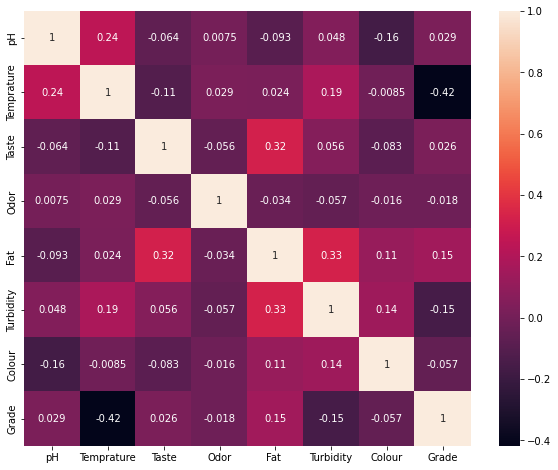

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(matriz_de_correlacao, annot=True) # o argumento "annot=True" nos mostra as anotações numéricas na matriz

#### Countplots

Por fim, daremos uma olhada em quais atributos estão mais **relacionados** a cada qualidade de leite.

Diante disso, faremos uso dos gráficos de barra do método "countplot", ainda da biblioteca "seaborn".

##### Relação do "pH" com a qualidade do leite.

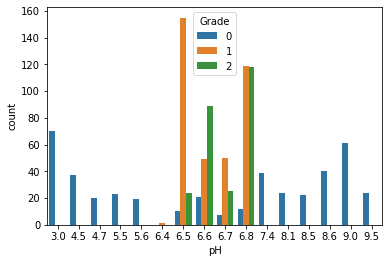

In [ ]:
sns.countplot(x="pH", hue="Grade", data=dados_alterados)

##### Relação da "Temperatura (Temprature)" com a qualidade do leite.

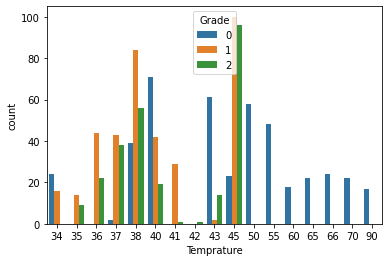

In [ ]:
sns.countplot(x="Temprature", hue="Grade", data=dados_alterados)

##### Relação do "Gosto (Taste)" com a qualidade do leite.

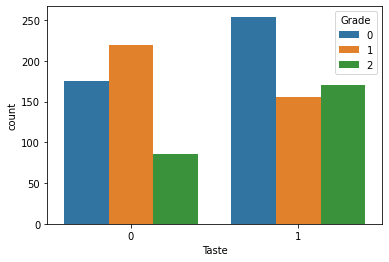

In [ ]:
sns.countplot(x="Taste", hue="Grade", data=dados_alterados)

##### Relação do "Odor" com a qualidade do leite.

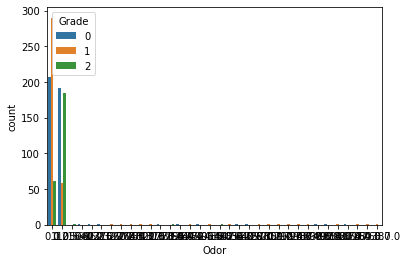

In [ ]:
sns.countplot(x="Odor", hue="Grade", data=dados_alterados)

##### Relação da "Gordura (Fat)" com a qualidade do leite.

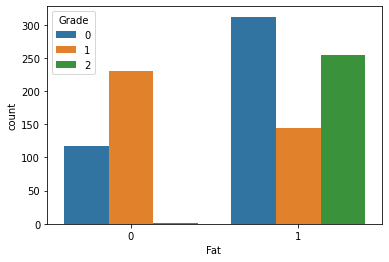

In [ ]:
sns.countplot(x="Fat ", hue="Grade", data=dados_alterados)

##### Relação da "Turbidez (Turbidity)" com a qualidade do leite.

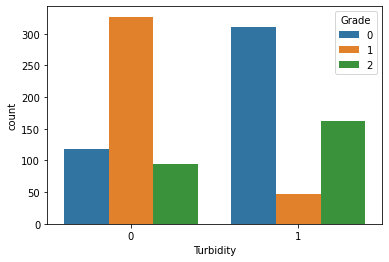

In [ ]:
sns.countplot(x="Turbidity", hue="Grade", data=dados_alterados)

##### Relação da "Cor (Colour)" com a qualidade do leite.

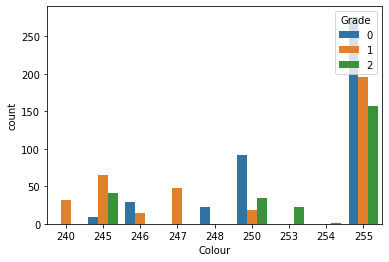

In [ ]:
sns.countplot(x="Colour", hue="Grade", data=dados_alterados)

### Observações da visualização de dados em gráfico

**Observação** 1: Ao tentar montar os gráficos de histograma, foi perceptível que as colunas "Temperature" e "Fat" estavam com erro de digitação. É importante ter isso em mente para evitar futuras confusões. Além disso, os gráficos de histograma promoveram uma visualização muito mais clara da distribuição dos dados, nos permitindo visualizar o comportamento anômalo da coluna "Odor" melhor.

**Observação 2:** O gráfico que apresenta a matriz de correlação nos permite concluir que os atributos "Gordura (Fat)" e "Turbidez (Turbidity)", juntamente com "Gordura (Fat)" e "Gosto (Taste)" apresentam uma **correlação positiva** um pouco mais elevada do que os outros (**0.33** e **0.32**, respectivamente). Já para maior **correlação negativa** temos as colunas "Temperatura (Temprature)" e "Qualidade (Grade)" com **-0.42**. Ainda assim, essas correlações não são significativas o suficiente para exigir tratamento especial nessas colunas.

**Observação 3:** No último grupo de gráficos, podemos levantar algumas hipóteses:

a) Leite de alta qualidade possui "pH" entre 6.4 e 6.8.

b) Leite de alta qualidade não se enquadra em amostras que se encontram acima de 50 graus, pelo contrário, são de baixa qualidade.

c) Gosto não parece influenciar muito na qualidade do leite.

d) Cheiro ruim parece ser algo difícil de se encontrar em leite de alta qualidade.

e) Elevado grau de Gordura é fundamental para leite de alta qualidade.

### Limpeza dos Dados

In [ ]:
dados_alterados.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0.0,1,0,254,2
1,6.6,36,0,1.0,0,1,253,2
2,8.5,70,1,1.0,1,1,246,0
3,9.5,34,1,1.0,0,1,255,0
4,6.6,37,0,396772.0,0,0,255,1


Iniciando a limpeza, **substituiremos** os valores aleatoriamente colocados no conjunto por valores nulos (np.nan).

Faremos isso pois **futuramente** será mais fácil de tratá-los.

Para atingirmos esse objetivo, iremos criar uma função chamada "trocar_valores_aleatorios_por_nulos".

A forma que essa função trabalha envolve o seguinte raciocínio:

A coluna "Odor", antes de receber valores aleatórios, apenas possuia números entre 0 e 1. Diante disso, podemos concluir que todos os valores aleatórios que terão **impacto grande** nessa coluna serão os que se diferenciarem de 0 e 1. Em outras palavras, iremos trocar todos os valores que não forem 0 ou 1 por nulo (np.nan).

In [ ]:
def trocar_valores_aleatorios_por_nulos():
  indice_da_coluna_odor = 3
  indice_da_ultima_linha = len(dados_alterados)

  for linha in range(0, indice_da_ultima_linha):
    if dados_alterados.iloc[linha, indice_da_coluna_odor] > 1:
      dados_alterados.iloc[linha, indice_da_coluna_odor] = np.nan

Vamos checar quantos valores nulos nosso conjunto de dados tem pelos métodos "isnull().sum()", **antes** de executar a função.

In [ ]:
dados_alterados.isnull().sum()

pH             0
Temprature     0
Taste          0
Odor          32
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

Agora, executaremos a função para substituir todos os valores diferentes de 0 e 1 por nulo (np.nan).

In [ ]:
trocar_valores_aleatorios_por_nulos()

Executaremos os métodos "isnull().sum()" mais uma vez para verificar os resultados.

In [ ]:
dados_alterados.isnull().sum()

pH             0
Temprature     0
Taste          0
Odor          64
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

Como mostrado acima, a quantidade de valores nulos **aumentou** para 64.

Ao utilizar, mais uma vez, o método "describe", podemos ver que a coluna de "Odor" **não mais apresenta** indícios dos valores aleatórios que foram adicionados anteriormente.

In [ ]:
dados_alterados.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,995.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.438191,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.496414,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


### Preparação dos dados

#### Encontrando a coluna mais desbalanceada

Antes de adentrarmos a seção de "Amostragem Estratificada", identificaremos primeiro qual das colunas de nosso dataset é a **mais desbalanceada.**

O motivo desse procedimento é passar a tal coluna mais desbalanceada como **argumento** na hora de realizar a amostragem estratificada.

Isso é necessário para o nossos conjuntos de treino e teste serem **representativos** do conjunto original.

Faremos essa investigação utilizando o método "value_counts" em todas as colunas.

In [ ]:
dados_alterados["pH"].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [ ]:
dados_alterados["Temprature"].value_counts()

45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64

In [ ]:
dados_alterados["Taste"].value_counts()

1    579
0    480
Name: Taste, dtype: int64

In [ ]:
dados_alterados["Odor"].value_counts()

0.0    559
1.0    436
Name: Odor, dtype: int64

In [ ]:
dados_alterados["Turbidity"].value_counts()

0    539
1    520
Name: Turbidity, dtype: int64

In [ ]:
dados_alterados["Fat "].value_counts()

1    711
0    348
Name: Fat , dtype: int64

In [ ]:
dados_alterados["Colour"].value_counts()

255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: Colour, dtype: int64

In [ ]:
dados_alterados["Grade"].value_counts()

0    429
1    374
2    256
Name: Grade, dtype: int64

A coluna "Colour" é a **mais desbalanceada** uma vez que concentra **mais de 50% de suas amostras** (628) em um único valor do total de nove.

Antes de qualquer decisão, devemos apontar que todas as colunas com valor mínimo em **1** não serão aceitas como argumento pela amostragem estratificada.

Se observarmos a coluna "Colour" acima, veremos que seu valor mínimo, infelizmente, se iguala a **1**.

Diante disso, iremos remover a linha onde existe uma única amostra com valor de 254 na coluna "Colour".

In [ ]:
dados_alterados.drop(dados_alterados[dados_alterados["Colour"] == 254].index, inplace=True)

Após isso, consertaremos a coluna de índice que foi afetada pelo comando acima.

In [ ]:
dados_alterados = dados_alterados.reset_index(drop=True)

Pronto, agora podemos utilizar essa coluna na amostragem estratificada.

#### Amostragem Estratificada

Um procedimento que não podemos esquecer é o de amostragem estraficada uma vez que queremos que nosso conjunto de teste seja representativo do conjunto original.

Na variável "split", abaixo, instanciaremos o **objeto capaz de realizar o procedimento da amostragem estratificada**.

In [ ]:
# n_splits é o número de iterações, o qual está em apenas 1
# test_size é a proporção que o conjunto de teste terá em relação ao conjunto total
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

Como havia sido investigado na etapa anterior, a coluna "Colour" é o um atributo que se encontra **consideravelmente desbalanceado**.

Por conta disso, iremos especificar ela nos argumentos da função "split" abaixo para ter certeza que o procedimento de amostragem estratifcada terá **consideração acentuada** nessa coluna em específico.

O **conjunto de treinamento estratificado** será guardado na variável "dados_de_treino_estratificados".

O **conjunto de teste estratificad**o será guardado na variável "dados_de_teste_estratificados".

Realizando a amostragem estratificada:

In [ ]:
for train_index, test_index in split.split(dados_alterados, dados_alterados["Colour"]):
  dados_de_treino_estratificados = dados_alterados.loc[train_index]
  dados_de_teste_estratificados = dados_alterados.loc[test_index]

Agora, criaremos uma variável para conter os **dados de treino sem o atributo alvo** e outra para conter o **atributo alvo dos dados de treino**.

In [ ]:
dados_de_treino = dados_de_treino_estratificados.drop('Grade', axis=1)

In [ ]:
coluna_alvo_treino = dados_de_treino_estratificados["Grade"].copy()

Além de treino, criaremos também uma variável para conter os **dados de teste sem o atributo alvo** e outra para conter o **atributo alvo dos dados de teste**.

In [ ]:
dados_de_teste = dados_de_teste_estratificados.drop('Grade', axis=1)

In [ ]:
coluna_alvo_teste = dados_de_teste_estratificados["Grade"].copy()

Abaixo, iremos checá-las.

Primeiro, as de treinamento:

In [ ]:
display(dados_de_treino)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
582,6.5,38,1,1.0,1,1,255
528,6.7,50,1,1.0,1,0,245
802,6.5,36,0,0.0,1,0,255
941,6.6,45,1,0.0,0,1,255
792,9.0,43,1,0.0,1,1,250
...,...,...,...,...,...,...,...
14,6.5,38,1,0.0,0,0,255
975,6.5,38,1,0.0,0,0,255
585,9.0,43,1,1.0,1,1,248
482,6.6,45,0,0.0,0,1,250


In [ ]:
coluna_alvo_treino.value_counts()

0    353
1    292
2    201
Name: Grade, dtype: int64

Depois, as de teste:

In [ ]:
display(dados_de_teste)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
343,6.7,38,1,0.0,1,0,255
491,6.5,36,0,0.0,1,0,255
61,3.0,40,1,1.0,1,1,255
1026,6.5,37,0,1.0,1,1,245
633,6.8,45,0,1.0,1,1,255
...,...,...,...,...,...,...,...
460,6.6,37,1,1.0,1,1,255
695,6.8,34,0,0.0,0,1,240
552,8.6,55,0,1.0,1,1,255
560,6.6,45,0,1.0,1,1,250


In [ ]:
coluna_alvo_teste.value_counts()

1    82
0    76
2    54
Name: Grade, dtype: int64

Tudo parece estar correto.

#### Pipeline

Continuando, nosso próximo dever é **tratar os dados nulos** presentes na coluna "Odor".

Considerando que nosso conjunto de dados apresenta um volume de dados relativamente baixo, remover as linhas com os valores nulos talvez não seja a melhor ideia.

Uma alternativa que não reduziria a quantidade de amostras presente nos dados seria preencher os valores nulos pela mediana.

Sabendo que a substituição de valorers nulos pela mediana é **sensível a outliers**, a mediana, de fato, poderia ser uma boa opção uma vez que não existem dados muito extremos em nosso DataFrame.

Além disso, iremos escalonar nossos dados através de uma técnica chamada **padronização**, com o objetivo de redimensioná-los para um espectro que auxilie, mais ainda, no nosso aprendizado de máquina.

A fim de automatizar os procedimentos citados acima, utilizaremos **Pipelines**.

In [ ]:
meu_pipeline = Pipeline([
        ('imputador', SimpleImputer(strategy="median")), # o SimpleImputer irá preencher os dados faltantes com a mediana dos valores da coluna
        ('padronizador', StandardScaler()), # o StandardScaler irá padronizar os dados
    ])

Primeiro, aplicaremos pipelines nos dados de **treino**:

In [ ]:
# a variável abaixo irá receber os dados de treino processados e transformados pelo pipeline
dados_de_treino_pos_pipeline = meu_pipeline.fit_transform(dados_de_treino)

Abaixo, verificaremos como ficaram os dados de **treino**:

In [ ]:
dados_de_treino_pos_pipeline

array([[-0.08932005, -0.61831157,  0.91386049, ...,  0.69959747,
         1.00236687,  0.73352684],
       [ 0.05192249,  0.536841  ,  0.91386049, ...,  0.69959747,
        -0.99763872, -1.58547056],
       [-0.08932005, -0.810837  , -1.09425893, ...,  0.69959747,
        -0.99763872,  0.73352684],
       ...,
       [ 1.67621172, -0.136998  ,  0.91386049, ...,  0.69959747,
         1.00236687, -0.88977134],
       [-0.01869878,  0.05552743, -1.09425893, ..., -1.42939339,
         1.00236687, -0.42597186],
       [ 1.67621172, -0.136998  ,  0.91386049, ...,  0.69959747,
         1.00236687, -0.42597186]])

Depois, aplicaremos pipelines nos dados de **teste**:

In [ ]:
# a variável abaixo irá receber os dados de teste processados e transformados pelo pipeline
dados_de_teste_pos_pipeline = meu_pipeline.transform(dados_de_teste)

Abaixo, verificaremos como ficaram os dados de **teste**:

In [ ]:
dados_de_teste_pos_pipeline

array([[ 0.05192249, -0.61831157,  0.91386049, ...,  0.69959747,
        -0.99763872,  0.73352684],
       [-0.08932005, -0.810837  , -1.09425893, ...,  0.69959747,
        -0.99763872,  0.73352684],
       [-2.56106452, -0.42578614,  0.91386049, ...,  0.69959747,
         1.00236687,  0.73352684],
       ...,
       [ 1.39372664,  1.01815457, -1.09425893, ...,  0.69959747,
         1.00236687,  0.73352684],
       [-0.01869878,  0.05552743, -1.09425893, ...,  0.69959747,
         1.00236687, -0.42597186],
       [ 0.12254377,  0.05552743,  0.91386049, ...,  0.69959747,
         1.00236687, -1.58547056]])

## Etapa 3: Construção dos Modelos

Este será o momento que iniciaremos de fato a construção de modelos de aprendizado de máquina.

O primeiro modelo que utilizaremos conterá um algoritmo de **Decision Tree Classifier (Árvore de Decisão)**.

Nosso segundo modelo conterá um algoritmo de **K-Nearest Neighbors Classifier (Vizinhos mais próximos de K)**.

### Justificativa das escolhas

**A primeira razão da escolha desses dois modelos em específico é o fato de que ambos são adequados para a tarefa em questão, a qual é de classificação.**

**A segunda razão da escolha desses dois modelos em específico é o fato de que utilizá-los nos permitirá fazer uma comparação direta de desempenho entre um algoritmo desenvolvido a partir de um método baseado em distância (K Nearest Neighbors) contra outro desenvolvido a partir de um método baseado em procura (Decision Tree).**

**A terceira razão da escolha desses dois modelos em específico é a facilidade de entendimento do funcionamento dos algoritmos em questão.**

### Decision Tree Classifier

#### Criando o modelo

Primeiramente, iremos atribuí-lo a uma variável chamada "modelo_arvore_de_decisao", criada abaixo.

In [ ]:
modelo_arvore_decisao = DecisionTreeClassifier(random_state=42)

Após isso, iremos **treinar o nosso modelo** em cima dos **dados de treinamento** que processamos na etapa anterior.

Utilizaremos, então, o método "fit", o qual receberá os "dados_de_treinamento_pos_pipeline" (que são nossos dados de treinamento sem a coluna alvo), assim como o "atributo_alvo_treinamento" (que é a coluna "Grade") como argumentos e treinará o modelo em cima deles.

In [ ]:
modelo_arvore_decisao.fit(dados_de_treino_pos_pipeline, coluna_alvo_treino)

DecisionTreeClassifier(random_state=42)

#### Acurácia nos dados de treinamento

Depois do treinamento, iremos fazer o modelo tentar tentar classificar as amostras dos "dados_de_treino_pos_pipeline" e salvaremos suas previsões na variável abaixo.

In [ ]:
previsoes_modelo_arvore_decisao = modelo_arvore_decisao.predict(dados_de_treino_pos_pipeline)

Para analisar o quão bem nosso modelo se saiu, iremos **visualizar sua acurácia** através da função "accuracy_score", a qual importamos lá no topo do documento, comparando as previsões feitas pelo modelo com a variável "atributo_alvo_treinamento", a qual contém as respostas verdadeiras.

In [ ]:
print(f"Acurácia: {accuracy_score(coluna_alvo_treino, previsoes_modelo_arvore_decisao)}")

Acurácia: 1.0


A acurácia do modelo sobre os dados de treino foi de **100%**.

#### Acurácia nos dados de teste

Além dos dados de treino, também iremos fazer o modelo tentar tentar classificar as amostras dos "dados_de_teste_pos_pipeline", salvando, mais uma vez, suas previsões na variável abaixo.

In [ ]:
previsoes_modelo_arvore_decisao = modelo_arvore_decisao.predict(dados_de_teste_pos_pipeline)

Novamente, iremos checar a **acurácia** do modelo com a função "accuracy_score".

In [ ]:
print(f"Acurácia: {accuracy_score(coluna_alvo_teste, previsoes_modelo_arvore_decisao)}")

Acurácia: 1.0


A acurácia do modelo sobre os dados de teste foi de **100%**.

#### Curvas de aprendizado

Nessa parte, visualizaremos o gráfico que mostra as curvas de aprendizado do nosso modelo.

Isso é importante para verificar a **comparação** do quão bem o modelo está se saindo na predição dos dados sobre os quais ele foi treinado e em dados novos.

Para isso, criaremos uma função que receberá: **o modelo**, **os dados** e a **coluna alvo dos dados**.

Nessa função, treinaremos o modelo várias vezes enquanto a cada treino aumentaremos a quantidade de dados sobre os quais ele treinará.

Além disso, após cada treino, salvaremos os resultados da **acurácia** sobre os dados de treino e sobre os dados de **validação** dentro de duas listas diferentes.

No final, criaremos um **gráfico** sobre essas listas de acurácias para **compararmos o aprendizado** do modelo sobre dados de treino e dados de validação.

In [ ]:
def mostrar_curvas_de_aprendizado(modelo, dados_sem_a_coluna_alvo, coluna_alvo):
    X_treino, X_validacao, y_treino, y_validacao = train_test_split(dados_sem_a_coluna_alvo, coluna_alvo, test_size=0.2, random_state=42)

    acuracia_dos_dados_de_treino = []
    acuracia_dos_dados_de_validacao = []

    for i in range(1, len(X_treino) + 1):
        modelo.fit(X_treino[:i], y_treino[:i])

        previsoes_sobre_dados_de_treino = modelo.predict(X_treino[:i])
        previsoes_sobre_dados_de_validacao = modelo.predict(X_validacao)

        acuracia_dos_dados_de_treino.append(accuracy_score(y_treino[:i], previsoes_sobre_dados_de_treino))
        acuracia_dos_dados_de_validacao.append(accuracy_score(y_validacao, previsoes_sobre_dados_de_validacao))

    plt.plot(np.sqrt(acuracia_dos_dados_de_treino), linewidth=1, label="Treino")
    plt.plot(np.sqrt(acuracia_dos_dados_de_validacao), linewidth=1, label="Validação")

    plt.legend(loc="upper center", fontsize=14)
    plt.xlabel("Quantidade de amostras de treino", fontsize=15)
    plt.ylabel("Acurácia", fontsize=15)

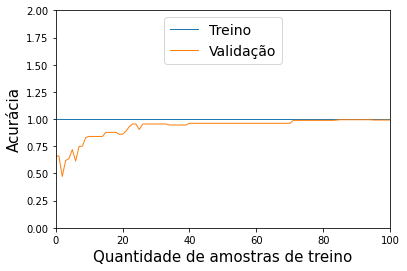

In [ ]:
modelo_arvore_decisao_para_curva_de_treino = DecisionTreeClassifier(random_state=42)

mostrar_curvas_de_aprendizado(modelo_arvore_decisao_para_curva_de_treino, dados_de_treino_pos_pipeline, coluna_alvo_treino)
plt.axis([0, 100, 0, 2])

plt.show()

Na figura acima, podemos ver que as curva de aprendizados possuem um **espaço entre elas** extremamente pequeno.

**Isso indica que nosso modelo consegue classificar bem tanto os dados de treino como os dados de validação.**

### K Nearest Neighbors

#### Criando o modelo

Vamos atribuí-lo a uma variável chamada "modelo_knn", criada abaixo.

In [ ]:
modelo_knn = KNeighborsClassifier()

Em seguida, **treinaremos o nosso modelo** em cima dos **dados de treinamento** processados.

Utilizaremos, então, o método "fit", o qual receberá os "dados_de_treinamento_pos_pipeline" (que são nossos dados de treinamento sem a coluna alvo), assim como o "atributo_alvo_treinamento" (que é a coluna "Grade") como argumentos e treinará o modelo em cima deles.

In [ ]:
modelo_knn.fit(dados_de_treino_pos_pipeline, coluna_alvo_treino)

KNeighborsClassifier()

#### Acurácia nos dados de treinamento

Depois do treinamento, iremos fazer o modelo tentar tentar classificar as amostras dos "dados_de_treino_pos_pipeline" e salvaremos suas previsões na variável abaixo.

In [ ]:
previsoes_modelo_knn = modelo_knn.predict(dados_de_treino_pos_pipeline)

Para analisar o quão bem nosso modelo se saiu, iremos **visualizar sua acurácia** através da função "accuracy_score", a qual importamos lá no topo do documento, comparando as previsões feitas pelo modelo com a variável "atributo_alvo_treinamento", a qual contém as respostas verdadeiras.

In [ ]:
print(f"Acurácia: {accuracy_score(coluna_alvo_treino, previsoes_modelo_knn)}")

Acurácia: 0.9929078014184397


A acurácia do modelo sobre os dados de treino foi de **99%**.

#### Acurácia nos dados de teste

Além dos dados de treino, também iremos fazer o modelo tentar tentar classificar as amostras dos "dados_de_teste_pos_pipeline", salvando, mais uma vez, suas previsões na variável abaixo.

In [ ]:
previsoes_modelo_knn = modelo_knn.predict(dados_de_teste_pos_pipeline)

Novamente, iremos checar a **acurácia** do modelo com a função "accuracy_score".

In [ ]:
print(f"Acurácia: {accuracy_score(coluna_alvo_teste, previsoes_modelo_knn)}")

Acurácia: 0.9952830188679245


A acurácia do modelo sobre os dados de teste foi de **99%**.

#### Curvas de aprendizado

Nessa parte, visualizaremos o gráfico que mostra as curvas de aprendizado do nosso modelo.

Isso é importante para verificar a **comparação** do quão bem o modelo está se saindo na predição dos dados sobre os quais ele foi treinado e em dados novos.

Para isso, criaremos uma função que receberá: **o modelo**, **os dados** e a **coluna alvo dos dados**.

Nessa função, treinaremos o modelo várias vezes enquanto a cada treino aumentaremos a quantidade de dados sobre os quais ele está treinará.

Além disso, após cada treino, salvaremos os resultados da **acurácia** sobre os dados de treino e sobre os dados de **validação** dentro de duas listas diferentes.

No final, criaremos um **gráfico** sobre essas listas de acurácias para **compararmos o aprendizado** do modelo sobre dados de treino e dados de validação.

In [ ]:
def mostrar_curvas_de_aprendizado(modelo, dados_sem_a_coluna_alvo, coluna_alvo):
    X_treino, X_validacao, y_treino, y_validacao = train_test_split(dados_sem_a_coluna_alvo, coluna_alvo, test_size=0.2, random_state=42)

    acuracia_dos_dados_de_treino = []
    acuracia_dos_dados_de_validacao = []

    for i in range(5, len(X_treino) + 1):
        modelo.fit(X_treino[:i], y_treino[:i])

        previsoes_sobre_dados_de_treino = modelo.predict(X_treino[:i])
        previsoes_sobre_dados_de_validacao = modelo.predict(X_validacao)

        acuracia_dos_dados_de_treino.append(accuracy_score(y_treino[:i], previsoes_sobre_dados_de_treino))
        acuracia_dos_dados_de_validacao.append(accuracy_score(y_validacao, previsoes_sobre_dados_de_validacao))

    plt.plot(np.sqrt(acuracia_dos_dados_de_treino), linewidth=1, label="Treino")
    plt.plot(np.sqrt(acuracia_dos_dados_de_validacao), linewidth=1, label="Validação")

    plt.legend(loc="upper center", fontsize=14)
    plt.xlabel("Quantidade de amostras de treino", fontsize=15)
    plt.ylabel("Acurácia", fontsize=15)

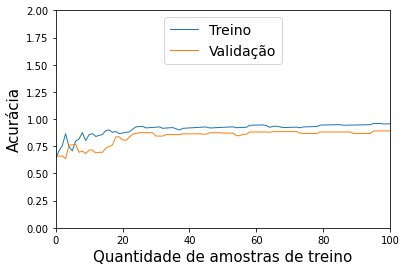

In [ ]:
modelo_knn_para_curva_de_treino = KNeighborsClassifier()

mostrar_curvas_de_aprendizado(modelo_knn_para_curva_de_treino, dados_de_treino_pos_pipeline, coluna_alvo_treino)
plt.axis([0, 100, 0, 2])

plt.show()

Nessa figura, podemos ver que as curva de aprendizados possuem um **espaço entre elas**  um pouco maior do que o modelo de Árvore de Decisão.

**Ainda assim, nosso modelo consegue classificar bem tanto os dados de treino como os dados de validação.**

## Etapa 4: Avaliação dos Modelos

### Validação Cruzada

Nesta seção, iremos iniciar a avaliação dos modelos utilizando o método da **validação cruzada**.

O número de iterações que utilizaremos será **cv=5**.

A forma de avaliarmos será através da **acurácia**.

#### Decision Tree Classifier com validação cruzada

Primeiro, faremos a validação cruzada no modelo de **árvore de decisão**.

O seu desempenho será a acurácia nas 5 iterações.

In [ ]:
desempenho_modelo_arvore_decisao_val_cruzada = cross_val_score(modelo_arvore_decisao, dados_de_treino_pos_pipeline, coluna_alvo_treino, cv=5, scoring="accuracy")

Após isso, mostraremos as acurácias de todas as iterações, assim como a **média** das acurácias e o **desvio padrão**.

In [ ]:
print(f"Desempenhos nas 5 iterações: {desempenho_modelo_arvore_decisao_val_cruzada}")

Desempenhos nas 5 iterações: [0.98823529 1.         0.98224852 0.99408284 1.        ]


In [ ]:
print(f"Média dos desempenhos: {desempenho_modelo_arvore_decisao_val_cruzada.mean()}")

Média dos desempenhos: 0.9929133310128785


In [ ]:
print(f"Desvio padrão: {desempenho_modelo_arvore_decisao_val_cruzada.std()}")

Desvio padrão: 0.006891033514341635


#### K Nearest Neighbor com validação cruzada

Após o de árvore de decisão, faremos a validação cruzada com o modelo dos **vizinhos mais próximos de k**.

O seu desempenho será a acurácia nas 5 iterações.

In [ ]:
desempenho_modelo_knn_val_cruzada = cross_val_score(modelo_knn, dados_de_treino_pos_pipeline, coluna_alvo_treino, cv=5, scoring="accuracy")

Após isso, mostraremos as acurácias de todas as iterações, assim como a **média** das acurácias e o **desvio padrão**.

In [ ]:
print(f"Desempenhos nas 5 iterações: {desempenho_modelo_knn_val_cruzada}")

Desempenhos nas 5 iterações: [0.97058824 0.98816568 0.9704142  0.98816568 0.99408284]


In [ ]:
print(f"Média dos desempenhos: {desempenho_modelo_knn_val_cruzada.mean()}")

Média dos desempenhos: 0.9822833275321964


In [ ]:
print(f"Desvio padrão: {desempenho_modelo_knn_val_cruzada.std()}")

Desvio padrão: 0.009859857960971441


### Análise de desempenho com precisão, revocação e curva ROC

Agora, iremos fazer a análise das medidas de desempenho dos nosso modelos treinados com validação cruzada.

Nossas medidas de desempenho serão: **Precisão**, **Revocação** e **Curva ROC**.

**Precisão é percentual de amostras verdadeiramente positivas sobre o total de amostras classificadas como positivas pelo modelo.**

Precisão = TP / TP + FP.

**Recall é o percentual de amostras positivas classificadas corretamente como positivas.**

Revocação = TP / TP + FN

**A Curva ROC (Curva Característica de Operação) é um gráfico para visualizarmos o desempenho de um classificador uma vez que nela podemos ver a taxar de verdadeiros positivos e falsos positivos.**

#### Análise de desempenho do Decision Tree Classifier

Para conseguirmos visualizar **precisão** e **revocação**, iremos utilizar a função "classification_report".

In [ ]:
previsoes_modelo_arvore_decisao = cross_val_predict(modelo_arvore_decisao, dados_de_treino_pos_pipeline, coluna_alvo_treino, cv=5)

In [ ]:
print(classification_report(coluna_alvo_treino, previsoes_modelo_arvore_decisao, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       353
           1       0.99      1.00      0.99       292
           2       0.99      0.99      0.99       201

    accuracy                           0.99       846
   macro avg       0.99      0.99      0.99       846
weighted avg       0.99      0.99      0.99       846



Ao analisar os resultados acima, podemos ver que a **precisão** em cada classe foi de **100%** para **0** (baixa qualidade), **99%** para **1** (média qualidade) e **99%** para **2** (alta qualidade), com a média de precisão igual a **99%**.

Já a **revocação** em cada classe foi de **99%** para **0** (baixa qualidade), **100%**  para **1** (média qualidade) e **99%** para **2** (alta qualidade), com a média de revocação igual a **99%**.

##### Curva ROC

Para criar o gráfico da curva ROC, precisaremos utilizar o método de "One VS. Rest" considerando que nossa tarefa é de classificação **multiclasse**.

Nesse sentido, utilizaremos um modelo de "OneVsRestClassifier" passando o algoritmo de árvore de decisão como **argumento**.

In [ ]:
modelo_arvore_decisao_one_vs_rest = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

Agora, treinaremos esse modelo.

In [ ]:
modelo_arvore_decisao_one_vs_rest.fit(dados_de_treino_pos_pipeline, coluna_alvo_treino)

OneVsRestClassifier(estimator=DecisionTreeClassifier(random_state=42))

Continuando, coletaremos as **probabilidades de previsão** para cada classe e guardaremos elas na variável abaixo.

Essa varíavel será chamada de "probabilidades_de_previsao" e a utilizaremos na hora de criar o gráfico da curva.

In [ ]:
probabilidades_de_previsao = modelo_arvore_decisao_one_vs_rest.predict_proba(dados_de_treino_pos_pipeline)

Antes de ir para a construção do gráfico, precisaremos transformar a coluna alvo para um formato **binário**.

Se não fizermos isso, **não será possível passar a coluna alvo como argumento** para a função "roc_curve".

Para realizar tal tarefa, antes, precisamos criar um vetor contendo todas as classes existentes no nosso dataset, as quais são **0** (leite de baixa qualidade), **1** (leite de média qualidade) e **2** (leite de alta qualidade).

In [ ]:
classes = np.unique(coluna_alvo_treino)
classes

array([0, 1, 2])

Também precisaremos criar uma variável para guardar a q**uantidade total de classes** do nosso conjuto de dados.

In [ ]:
quantidade_de_classes = classes.shape[0]
quantidade_de_classes

3

Agora sim, transformaremos a coluna alvo.

In [ ]:
coluna_alvo_binaria = label_binarize(coluna_alvo_treino, classes=classes)

In [ ]:
coluna_alvo_binaria

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

O próximo passo, então, é criar os dicionários que irão conter as **taxas de verdadeiros e falsos positivos**, o threshold e a **área embaixo da curva** (AUC).

In [ ]:
taxa_verdadeiros_positivos = {}
taxa_falsos_positivos= {}
threshold = {}
area_embaixo_da_curva = {}

Por fim, para gerar o gráfico, iremos iterar sobre todas as classes e, em seguida, criaremos a curva sobre no formato One VS. Rest.

As três curvas de todas as classes estarão desenhadas no mesmo gráfico por motivos de comparação.

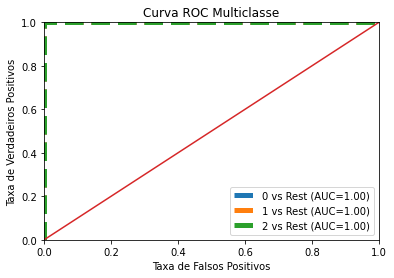

In [ ]:
for i in range(quantidade_de_classes):
  taxa_falsos_positivos[i], taxa_verdadeiros_positivos[i], threshold[i] = roc_curve(coluna_alvo_binaria[:,i], probabilidades_de_previsao[:,i])
  area_embaixo_da_curva[i] = auc(taxa_falsos_positivos[i], taxa_verdadeiros_positivos[i])

  plt.plot(taxa_falsos_positivos[i], taxa_verdadeiros_positivos[i], linestyle="--", linewidth=5, label="%s vs Rest (AUC=%0.2f)"%(np.unique(coluna_alvo_treino)[i], area_embaixo_da_curva[i]))
plt.plot([0,1],[0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Curva ROC Multiclasse")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.show()

Ao observarmos a curva ROC acima, podemos ver que o nosso classificador pode ser considerado **perfeito** uma vez que todas as suas **linhas estão concentradas nas extremidades** do gráfico.

#### Análise de desempenho do K Nearest Neighbors

Mais uma vez, iremos utilizar a função "classification_report" para analisar, dessa vez, o desempenho do modelo dos vizinhos mais próximos de k.

In [ ]:
previsoes_modelo_knn = cross_val_predict(modelo_knn, dados_de_treino_pos_pipeline, coluna_alvo_treino, cv=5)

In [ ]:
print(classification_report(coluna_alvo_treino, previsoes_modelo_knn, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       353
           1       0.97      1.00      0.99       292
           2       0.99      0.96      0.97       201

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



Ao analisar os resultados acima, podemos ver que a **precisão** em cada classe foi de **99%** para **0** (baixa qualidade), **97%** para **1** (média qualidade) e **99%** para **2** (alta qualidade), com a média de precisão igual a **98%**.

Já a **revocação** em cada classe foi de **98%** para **0** (baixa qualidade), **100%**  para **1** (média qualidade) e **96%** para **2** (alta qualidade), com a média de revocação igual a **98%**.

##### Curva ROC

Para criar o gráfico da curva ROC, precisaremos utilizar o método de "One VS. Rest" considerando que nossa tarefa é de classificação **multiclasse**.

Nesse sentido, utilizaremos um modelo de "OneVsRestClassifier" passando o algoritmo de árvore de decisão como **argumento**.

In [ ]:
modelo_knn_one_vs_rest = OneVsRestClassifier(KNeighborsClassifier())

Agora, treinaremos esse modelo.

In [ ]:
modelo_knn_one_vs_rest.fit(dados_de_treino_pos_pipeline, coluna_alvo_treino)

OneVsRestClassifier(estimator=KNeighborsClassifier())

Continuando, coletaremos as **probabilidades de previsão** para cada classe e guardaremos elas na variável abaixo.

Essa varíavel será chamada de "probabilidades_de_previsao" e a utilizaremos na hora de criar o gráfico da curva.

In [ ]:
probabilidades_de_previsao = modelo_knn_one_vs_rest.predict_proba(dados_de_treino_pos_pipeline)

Antes de ir para a construção do gráfico, precisaremos transformar a coluna alvo para um formato **binário**.

Se não fizermos isso, **não será possível passar a coluna alvo como argumento** para a função "roc_curve".

Para realizar tal tarefa, antes, precisamos criar um vetor contendo todas as classes existentes no nosso dataset, as quais são **0** (leite de baixa qualidade), **1** (leite de média qualidade) e **2** (leite de alta qualidade).

In [ ]:
classes = np.unique(coluna_alvo_treino)
classes

array([0, 1, 2])

Também precisaremos criar uma variável para guardar a q**uantidade total de classes** do nosso conjuto de dados.

In [ ]:
quantidade_de_classes = classes.shape[0]
quantidade_de_classes

3

Agora sim, transformaremos a coluna alvo.

In [ ]:
coluna_alvo_binaria = label_binarize(coluna_alvo_treino, classes=classes)

In [ ]:
coluna_alvo_binaria

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

O próximo passo, então, é criar os dicionários que irão conter as **taxas de verdadeiros e falsos positivos**, o threshold e a **área embaixo da curva** (AUC).

In [ ]:
taxa_verdadeiros_positivos = {}
taxa_falsos_positivos= {}
threshold = {}
area_embaixo_da_curva = {}

Por fim, para gerar o gráfico, iremos iterar sobre todas as classes e, em seguida, criaremos a curva sobre no formato "One VS. Rest".

As três curvas de todas as classes estarão desenhadas no mesmo gráfico por motivos de comparação.

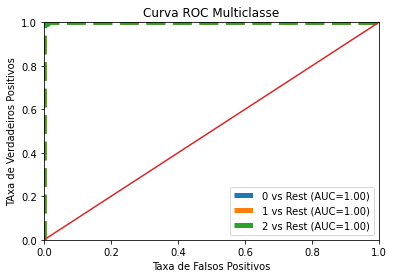

In [ ]:
for i in range(quantidade_de_classes):
  taxa_falsos_positivos[i], taxa_verdadeiros_positivos[i], threshold[i] = roc_curve(coluna_alvo_binaria[:,i], probabilidades_de_previsao[:,i])
  area_embaixo_da_curva[i] = auc(taxa_falsos_positivos[i], taxa_verdadeiros_positivos[i])

  plt.plot(taxa_falsos_positivos[i], taxa_verdadeiros_positivos[i], linestyle="--", linewidth=5, label="%s vs Rest (AUC=%0.2f)"%(np.unique(coluna_alvo_treino)[i], area_embaixo_da_curva[i]))
plt.plot([0,1],[0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Curva ROC Multiclasse")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("TAxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.show()

Ao observarmos a curva ROC acima, podemos ver que o este segundo classificador também pode ser considerado **perfeito** uma vez que todas as suas **linhas estão concentradas nas extremidades** do gráfico.

### Refinamento dos Modelos

Nesta penúltima seção, iremos utilizar **Grid Search** para encontrarmos combinação de hiperparâmetros mais otimizada para o nosso modelo.

**Não** utilizaremos **Randomized Search** pois nossa procura por hiperparâmetros não terá um espectro muito grande.

#### Refinamento de Decision Tree Classifier

Os hiperparâmetros que iremos incluir na grade do modelo de árvore de decisão são:

**max_depth** = indica a profundidade máxima da árvore


**max_features** = o número máximo de características que são avaliados para divisão em cada nó.


**min_samples_leaf** = indica a quantidade mínima de amostras necessárias para se estar em um nó folha.


**max_leaf_nodes** = indica a quantidade máxima de nós folha.

Dessa forma, criaremos, abaixo, a grade de hiperparâmetros.

In [ ]:
grade_de_parametros = [
    {"max_depth": [5, 10, 30], "max_features": [2, 4, 6], "min_samples_leaf": [3, 5, 10, 20], "max_leaf_nodes": [2, 4, 8, 16, 32]}
]

Em seguida, criaremos um modelo para ser utilizado pelo algoritmo de **Grid Search**.

In [ ]:
modelo_arvore_decisao_com_grid = DecisionTreeClassifier(random_state=42)

Realizaremos a busca em grade, **passaremos a grade que montamos acima como argumento** e guardaremos seus resultados na variável "busca_em_grade" abaixo.

In [ ]:
busca_em_grade = GridSearchCV(modelo_arvore_decisao_com_grid, grade_de_parametros, cv=5, scoring="accuracy")

Agora, utilizaremos o método "fit" para realizar os treinamentos do modelo em Grid Search.

In [ ]:
busca_em_grade.fit(dados_de_treino_pos_pipeline, coluna_alvo_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [5, 10, 30], 'max_features': [2, 4, 6],
                          'max_leaf_nodes': [2, 4, 8, 16, 32],
                          'min_samples_leaf': [3, 5, 10, 20]}],
             scoring='accuracy')

Para **mostrar** a combinação de hiperparâmetros mais otimizada que nossa Grid Search encontrou, utilizaremos o método "best_params_".

In [ ]:
busca_em_grade.best_params_

{'max_depth': 10,
 'max_features': 6,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 3}

Por fim, para **coletar** o modelo de árvore de decisão o qual possui a combinação de hiperparâmetros mostrada acima, utilizaremos a função "best_estimator_" e chamaremos esse modelo otimizado de "modelo_arvore_decisao_otimizado".

In [ ]:
modelo_arvore_decisao_otimizado = busca_em_grade.best_estimator_

#### Refinamento de K Nearest Neighbors

Os hiperparâmetros que iremos incluir na grade do modelo dos vizinhos mais próximos de k são:

**n_neighbors** = quantidade de vizinhos.

**weights** = define a influência que cada vizinho terá. "uniform" fará todos na mesma fronteira terem a mesma influência. "distance" fará os mais próximos terem influência maior.

**metric** = indica como a distância dos pontos de vizinhança são escolhidas.

Dessa forma, criaremos, abaixo, a grade de hiperparâmetros.

In [ ]:
grade_de_parametros = [
    {"n_neighbors": [5, 7, 11, 19], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
]

Em seguida, criaremos um modelo para ser utilizado pelo algoritmo de **Grid Search**.

In [ ]:
modelo_knn_com_grid = KNeighborsClassifier()

Realizaremos a busca em grade, **passaremos a grade que montamos acima como argumento** e guardaremos seus resultados na variável "busca_em_grade" abaixo.

In [ ]:
busca_em_grade = GridSearchCV(modelo_knn_com_grid, grade_de_parametros, cv=5, scoring="accuracy")

Agora, utilizaremos o método "fit" para realizar os treinamentos do modelo em Grid Search.

In [ ]:
busca_em_grade.fit(dados_de_treino_pos_pipeline, coluna_alvo_treino)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [5, 7, 11, 19],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

Para **mostrar** a combinação de hiperparâmetros mais otimizada que nossa Grid Search encontrou, utilizaremos o método "best_params_".

In [ ]:
busca_em_grade.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

Por fim, para **coletar** o modelo de vizinhos mais próximos de k o qual possui a combinação de hiperparâmetros mostrada acima, utilizaremos a função "best_estimator_" e chamaremos esse modelo otimizado de "modelo_knn_otimizado".

In [ ]:
modelo_knn_otimizado = busca_em_grade.best_estimator_

### Comparação final do desempenho dos modelos

Finalmente, nesta última seção, iremos testar nossos modelos otimizados em cima dos **dados de teste** para a avaliação final de desempenho.

Primeiro, verificaremos o desempenho do modelo de árvore de decisão:

In [ ]:
previsoes_modelo_arvore_decisao_otimizado = modelo_arvore_decisao_otimizado.predict(dados_de_teste_pos_pipeline)

In [ ]:
print(classification_report(coluna_alvo_teste, previsoes_modelo_arvore_decisao_otimizado, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       1.00      1.00      1.00        82
           2       0.98      1.00      0.99        54

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



Modelo: **Árvore de Decisão**

Acurácia sobre dados de teste: **100%**

Precisão: **99%**

Revocação: **100%**

Agora, verificaremos o desempenho do modelo de vizinhos mais próximos de k:

In [ ]:
previsoes_modelo_knn_otimizado = modelo_knn_otimizado.predict(dados_de_teste_pos_pipeline)

In [ ]:
print(classification_report(coluna_alvo_teste, previsoes_modelo_knn_otimizado, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        54

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



Modelo: **Vizinhos Mais Próximos de K**

Acurácia sobre dados de teste: **100%**

Precisão: **100%**

Revocação: **100%**

**Ambos modelos tiveram uma acurácia nos dados de teste marcando 100%.**